In [75]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

In [2]:
# api key for OpenWeatherMap
api_key = '0ef0e1e8cae0c9ce2fd55f511fb39ea6'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'Imperial'
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0ef0e1e8cae0c9ce2fd55f511fb39ea6&units=Imperial&q='

In [6]:
temp = []
lat = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    weather_response = requests.get(query_url + city).json()
    
    try:
        temp.append(weather_response["main"]['temp'])
        lat.append(weather_response['coord']['lat'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        
    except (KeyError, IndexError):
        pass
       

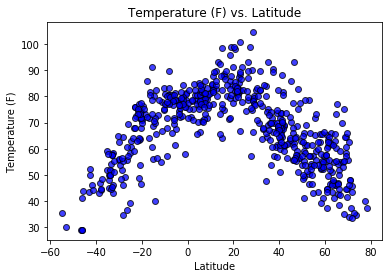

In [72]:
plt.scatter(lat, temp, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.show()
#This scatterplot shows a strong relationship between temperature and latitude.  


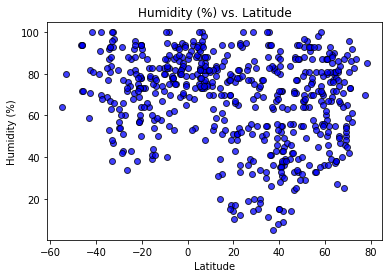

In [71]:
plt.scatter(lat, humidity, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()
#This scatterplot shows a weak relationship between humidity and latitude.


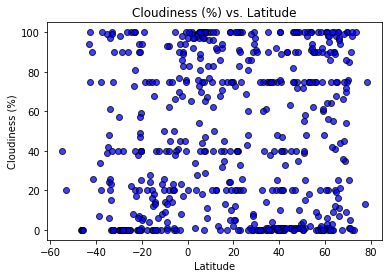

In [70]:
plt.scatter(lat, cloudiness, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()
#This scatterplot shows a weak relationship between cloudiness and latitude.


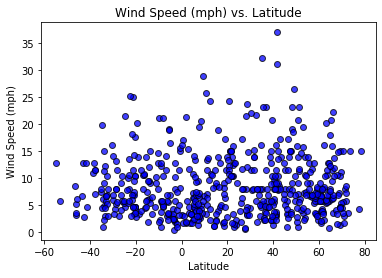

In [69]:
plt.scatter(lat, wind_speed, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()
#The scatterplot shows a weak relationship between the wind speed and latitude.

In [15]:
weather_df = pd.DataFrame(
    {"City":pd.Series(cities),
    "Temp":pd.Series(temp),
    "Latitude":pd.Series(lat),
    "Humidity":pd.Series(humidity),
    "Cloudiness":pd.Series(cloudiness),
    "Wind Speed":pd.Series(wind_speed)})
weather_df.head()

City   Temp  Latitude  Humidity  Cloudiness  Wind Speed
0            barrow  37.40     71.29      86.0        90.0        8.05
1         manokwari  81.16     -0.87      75.0        76.0        8.08
2       yurginskoye  43.66     56.82      72.0         7.0       11.59
3  illoqqortoormiut  30.09    -53.15      80.0        20.0        5.82
4      punta arenas  35.60    -54.80      64.0        40.0       12.75

In [23]:
weather_north = weather_df.loc[weather_df["Latitude"] >=0]
weather_north

City   Temp  Latitude  Humidity  Cloudiness  Wind Speed
0              barrow  37.40     71.29      86.0        90.0        8.05
2         yurginskoye  43.66     56.82      72.0         7.0       11.59
6              neiafu  79.93      5.96      73.0       100.0        4.05
7            tambilil  78.08      4.88      88.0        54.0        7.27
10               poum  93.20     46.41      24.0         1.0       17.22
..                ...    ...       ...       ...         ...         ...
559             mahon  74.73     38.89      49.0         1.0        5.82
561  malinovoye ozero  65.91     38.42      43.0        92.0        4.70
563        carutapera  55.89     46.43      71.0         0.0       11.41
565        boissevain  62.60     40.97      33.0        40.0       10.29
566         kondopoga  43.39     60.75      81.0        64.0        2.10

[392 rows x 6 columns]

In [25]:
x_axis = weather_north['Latitude'].values
y_axis = weather_north['Temp'].values

y= -0.5242327976939696x + 88.15867045018503.


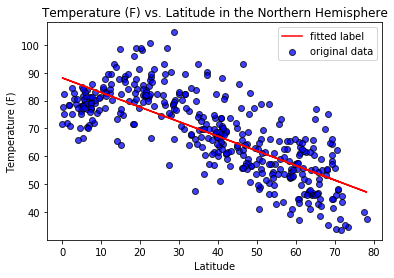

In [80]:
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Temperature (F) vs. Latitude in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
print(f'y= {slope}x + {intercept}.')
plt.plot(x_axis, intercept + slope*x_axis, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot show a strong relationship between Temperature and Latitude.

In [27]:
x_axis1 = weather_north['Latitude'].values
y_axis1 = weather_north['Humidity'].values

y= -0.12117255333407531x + 69.39948265953902.


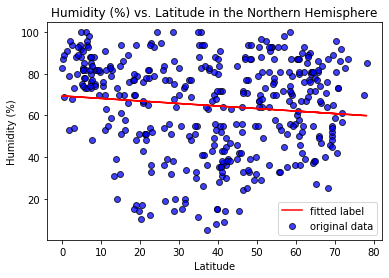

In [81]:
plt.scatter(x_axis1, y_axis1, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Humidity (%) vs. Latitude in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
slope, intercept, r_value, p_value, std_err = linregress(x_axis1, y_axis1)
print(f'y= {slope}x + {intercept}.')
plt.plot(x_axis1, intercept + slope*x_axis1, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between the Latitude and Humidity.

In [29]:
x_axis2 = weather_north['Latitude'].values
y_axis2 = weather_north['Cloudiness'].values

y= -0.2076387646738086x + 57.23731844232198.


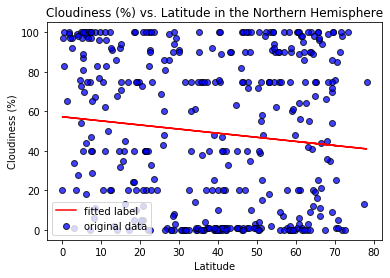

In [82]:
plt.scatter(x_axis2, y_axis2, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Cloudiness (%) vs. Latitude in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
slope, intercept, r_value, p_value, std_err = linregress(x_axis2, y_axis2)
print(f'y= {slope}x + {intercept}.')
plt.plot(x_axis2, intercept + slope*x_axis2, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between the Latitude and Cloudiness.

In [31]:
x_axis3 = weather_north['Latitude'].values
y_axis3 = weather_north['Wind Speed'].values

y= 0.004813781665270451x + 8.329825394611571.


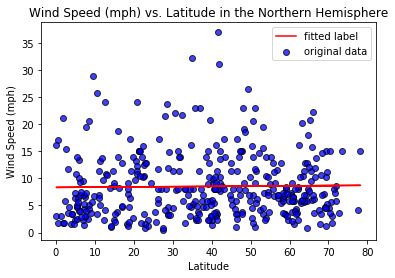

In [83]:
plt.scatter(x_axis3, y_axis3, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Wind Speed (mph) vs. Latitude in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
slope, intercept, r_value, p_value, std_err = linregress(x_axis3, y_axis3)
print(f'y= {slope}x + {intercept}.')
plt.plot(x_axis3, intercept + slope*x_axis3, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between Wind Speed and Latitude.

In [33]:
weather_south = weather_df.loc[weather_df["Latitude"] < 0]
weather_south

City   Temp  Latitude  Humidity  Cloudiness  Wind Speed
1           manokwari  81.16     -0.87      75.0        76.0        8.08
3    illoqqortoormiut  30.09    -53.15      80.0        20.0        5.82
4        punta arenas  35.60    -54.80      64.0        40.0       12.75
5             ushuaia  73.40    -18.65      73.0        75.0        3.36
8            takoradi  75.78     -0.74      65.0        40.0       14.99
..                ...    ...       ...       ...         ...         ...
540       charlestown  57.92    -34.73      77.0        42.0       19.84
554           karamay  78.80    -15.53      83.0        75.0       13.87
560        bani walid  77.09     -1.88      71.0        17.0        0.92
562           hoquiam  76.91     -3.67      89.0        90.0        2.35
564       yerbogachen  71.13     -5.90      53.0        20.0        2.24

[175 rows x 6 columns]

In [49]:
y_axis4 = weather_south['Latitude'].values
x_axis4 = weather_south['Temp'].values


y= 0.7240304760759353x + -66.96697105107395.


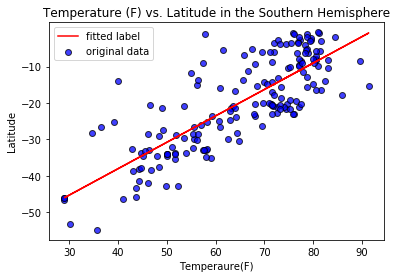

In [84]:
plt.scatter(x_axis4, y_axis4, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Temperature (F) vs. Latitude in the Southern Hemisphere")
plt.xlabel('Temperaure(F)')
plt.ylabel("Latitude")
plt.xticks(np.arange(0, 100, step=10))
plt.yticks(np.arange(-60, 0, step=10))
slope, intercept, r_value, p_value, std_err = linregress(x_axis4, y_axis4)
print(f'y= {slope}x + {intercept}.')
plt.plot(x_axis4, intercept + slope*x_axis4, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a strong relationship between Temperature and Latitude.

In [53]:
x_axis5 = weather_south['Humidity'].values
y_axis5 = weather_south['Latitude'].values

y= 0.039797363219251404x + -22.99090726376245.


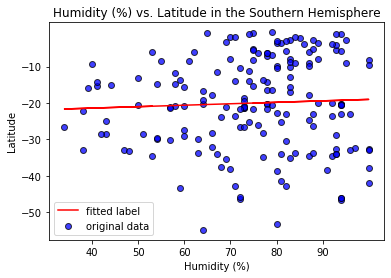

In [85]:
plt.scatter(x_axis5, y_axis5, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Humidity (%) vs. Latitude in the Southern Hemisphere")
plt.xlabel('Humidity (%)')
plt.ylabel("Latitude")
plt.xticks(np.arange(0, 100, step=10))
plt.yticks(np.arange(-60, 0, step=10))
slope, intercept, r_value, p_value, std_err = linregress(x_axis5, y_axis5)
print(f'y= {slope}x + {intercept}.')
plt.plot(x_axis5, intercept + slope*x_axis5, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between Humidity and Latitude.

In [55]:
x_axis6 = weather_south['Cloudiness'].values
y_axis6 = weather_south['Latitude'].values

y= 0.03350578543628935x + -21.298566340281806.


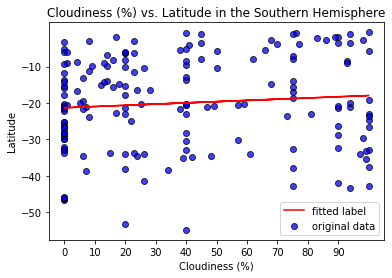

In [86]:
plt.scatter(x_axis6, y_axis6, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Cloudiness (%) vs. Latitude in the Southern Hemisphere")
plt.xlabel('Cloudiness (%)')
plt.ylabel("Latitude")
plt.xticks(np.arange(0, 100, step=10))
plt.yticks(np.arange(-60, 0, step=10))
slope, intercept, r_value, p_value, std_err = linregress(x_axis6, y_axis6)
print(f'y= {slope}x + {intercept}.')
plt.plot(x_axis6, intercept + slope*x_axis6, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between Cloudiness and Latitude.

In [57]:
x_axis7 = weather_south["Wind Speed"].values
y_axis7 = weather_south['Latitude'].values

y= -0.10784687117823313x + -19.14092529041631.


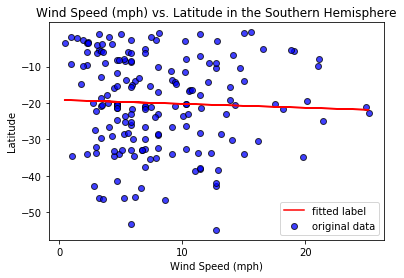

In [87]:
plt.scatter(x_axis7, y_axis7, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Wind Speed (mph) vs. Latitude in the Southern Hemisphere")
plt.xlabel('Wind Speed (mph)')
plt.ylabel("Latitude")
plt.xticks(np.arange(0, 30, step=10))
plt.yticks(np.arange(-60, 0, step=10))
slope, intercept, r_value, p_value, std_err = linregress(x_axis7, y_axis7)
print(f'y= {slope}x + {intercept}.')
plt.plot(x_axis7, intercept + slope*x_axis7, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between Wind Speed and Latitude.